Usei o mnst que eh um conjunto bem conhecido, mas gostaria de testar outros no futuro

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
(x_treino, y_treino), (x_teste, y_teste) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_treino = x_treino.astype("float32") / 255.0
x_teste  = x_teste.astype("float32") / 255.0

In [5]:
x_treino_cnn = np.expand_dims(x_treino, -1)
x_teste_cnn  = np.expand_dims(x_teste, -1)

num_classes = 10

In [7]:
def build_cnn_model(
    conv_layers=2,
    filters_first=32,
    kernel_size=(3, 3),
    use_batchnorm=False,
    dense_units=128,
    dropout_rate=0.5
):
    model = models.Sequential()

    model.add(layers.Conv2D(filters_first, kernel_size, activation='relu',
                            input_shape=(28, 28, 1)))
    if use_batchnorm:
        model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    filters = filters_first
    for _ in range(conv_layers - 1):
        filters *= 2
        model.add(layers.Conv2D(filters, kernel_size, activation='relu'))
        if use_batchnorm:
            model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [8]:
configs = [
    {"name": "cnn_1", "conv_layers": 1, "filters_first": 32, "dense_units": 128, "dropout_rate": 0.5, "use_batchnorm": False},
    {"name": "cnn_2", "conv_layers": 2, "filters_first": 32, "dense_units": 128, "dropout_rate": 0.5, "use_batchnorm": False},
    {"name": "cnn_3", "conv_layers": 2, "filters_first": 64, "dense_units": 256, "dropout_rate": 0.5, "use_batchnorm": False},
    {"name": "cnn_4", "conv_layers": 3, "filters_first": 32, "dense_units": 256, "dropout_rate": 0.5, "use_batchnorm": True},
    {"name": "cnn_5", "conv_layers": 3, "filters_first": 64, "dense_units": 256, "dropout_rate": 0.5, "use_batchnorm": True},
    {"name": "cnn_6", "conv_layers": 2, "filters_first": 32, "dense_units": 64,  "dropout_rate": 0.3, "use_batchnorm": False},
]

Daria pra aumentar a quantidade de epocas no treino, mas o colab estava desconectando pelo uso de memoria RAM

In [9]:
results = []

EPOCHS = 5
BATCH_SIZE = 128

for cfg in configs:
    print(f"\nTreinando modelo: {cfg['name']}")
    model = build_cnn_model(**{k: v for k, v in cfg.items() if k != "name"})

    history = model.fit(
        x_treino_cnn, y_treino,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_split=0.1,
        verbose=2
    )

    test_loss, test_acc = model.evaluate(x_teste_cnn, y_teste, verbose=0)
    n_params = model.count_params()

    results.append({
        "name": cfg["name"],
        "test_accuracy": test_acc,
        "test_loss": test_loss,
        "n_params": n_params,
        "history": history.history,
        "model": model,
    })

df_results = pd.DataFrame([
    {"name": r["name"], "test_accuracy": r["test_accuracy"], "n_params": r["n_params"]}
    for r in results
]).sort_values("test_accuracy", ascending=False)

df_results



Treinando modelo: cnn_1


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 - 27s - 64ms/step - accuracy: 0.7999 - loss: 0.5751 - val_accuracy: 0.8607 - val_loss: 0.3752
Epoch 2/5
422/422 - 25s - 60ms/step - accuracy: 0.8696 - loss: 0.3712 - val_accuracy: 0.8947 - val_loss: 0.2961
Epoch 3/5
422/422 - 25s - 58ms/step - accuracy: 0.8846 - loss: 0.3268 - val_accuracy: 0.8993 - val_loss: 0.2770
Epoch 4/5
422/422 - 41s - 97ms/step - accuracy: 0.8930 - loss: 0.2993 - val_accuracy: 0.9017 - val_loss: 0.2754
Epoch 5/5
422/422 - 41s - 97ms/step - accuracy: 0.9009 - loss: 0.2790 - val_accuracy: 0.9057 - val_loss: 0.2627

Treinando modelo: cnn_2
Epoch 1/5
422/422 - 41s - 98ms/step - accuracy: 0.7545 - loss: 0.6753 - val_accuracy: 0.8482 - val_loss: 0.4054
Epoch 2/5
422/422 - 40s - 96ms/step - accuracy: 0.8474 - loss: 0.4299 - val_accuracy: 0.8743 - val_loss: 0.3379
Epoch 3/5
422/422 - 40s - 95ms/step - accuracy: 0.8674 - loss: 0.3748 - val_accuracy: 0.8833 - val_loss: 0.3121
Epoch 4/5
422/422 - 41s - 96ms/step - accuracy: 0.8769 - loss: 0.3410 - val_acc

,name,test_accuracy,n_params
2,cnn_3,0.9010,896522
0,cnn_1,0.8994,693962
1,cnn_2,0.8890,225034
4,cnn_5,0.8887,439818
5,cnn_6,0.8811,121930
3,cnn_4,0.8803,129162


Tentando pegar os melhores por acuracia

In [10]:
top2 = df_results.head(2)["name"].tolist()
top2

['cnn_3', 'cnn_1']

In [11]:
def plot_confusion_matrix_for_model(result_obj, x_teste, y_teste, title=""):
    y_pred_probs = result_obj["model"].predict(x_teste)
    y_pred = np.argmax(y_pred_probs, axis=1)

    cm = confusion_matrix(y_teste, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=False, fmt="d")
    plt.title(title)
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.show()

    print(classification_report(y_teste, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


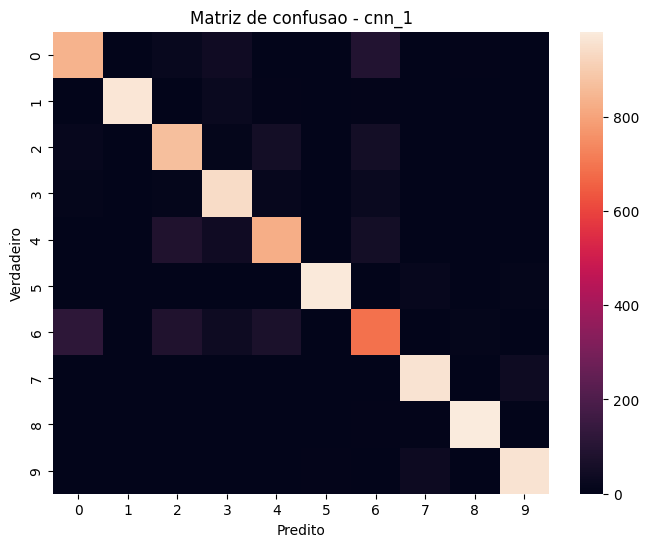

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.82      0.87      0.84      1000
           3       0.86      0.94      0.90      1000
           4       0.85      0.83      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.75      0.69      0.72      1000
           7       0.95      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


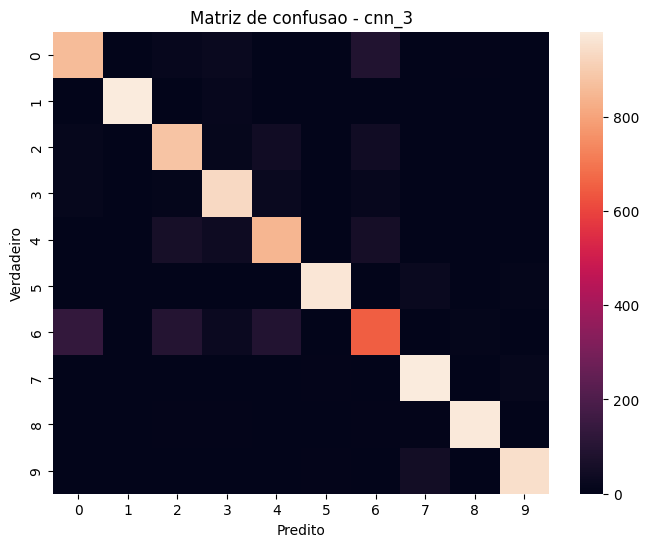

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.88      0.85      1000
           3       0.88      0.93      0.90      1000
           4       0.84      0.84      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.75      0.65      0.70      1000
           7       0.93      0.98      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [12]:
for r in results:
    if r["name"] in top2:
        plot_confusion_matrix_for_model(r, x_teste_cnn, y_teste, title=f"Matriz de confusao - {r['name']}")

A CNN 1 apresentou acurácia próxima de 90% e resultados ate que equilibrados entre as classes. O modelo é simples, mas aprende bem os padrões das imagens e mantém boa estabilidade. Comete poucos erros e oferece um ótimo desempenho considerando sua baixa complexidade e tambem a quantidade baixa de epocas

A CNN 3 também atingiu cerca de 90% de acurácia. Aumentar a profundidade trouxe pequenas melhorias em algumas classes, mas o desempenho geral é muito semelhante ao da primeira CNN. O modelo é consistente e generaliza bem, mas com ganhos marginais em relação à arquitetura mais simples. Acredito que o desempenho melhoraria, com o aumento das epocas.

# Teste com MLP

In [24]:
(x_treino, y_treino), (x_teste, y_teste) = fashion_mnist.load_data()

x_treino = x_treino.astype("float32") / 255.0
x_teste  = x_teste.astype("float32") / 255.0

x_treino = x_treino.reshape(-1, 28 * 28)
x_teste  = x_teste.reshape(-1, 28 * 28)

In [25]:
num_classes = 10

In [26]:
def build_mlp_model(hidden_layers=2, units_first=128, use_batchnorm=False, dropout_rate=0.5):
    model = models.Sequential()
    model.add(layers.Input(shape=(28*28,)))
    units = units_first
    for _ in range(hidden_layers):
        model.add(layers.Dense(units, activation='relu'))
        if use_batchnorm:
            model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))
        units *= 2
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [27]:
configs = [
    {"name": "mlp_1", "hidden_layers": 1, "units_first": 64,  "dropout_rate": 0.3, "use_batchnorm": False},
    {"name": "mlp_2", "hidden_layers": 2, "units_first": 64,  "dropout_rate": 0.5, "use_batchnorm": False},
    {"name": "mlp_3", "hidden_layers": 2, "units_first": 128, "dropout_rate": 0.5, "use_batchnorm": False},
    {"name": "mlp_4", "hidden_layers": 3, "units_first": 64,  "dropout_rate": 0.5, "use_batchnorm": True},
    {"name": "mlp_5", "hidden_layers": 3, "units_first": 128, "dropout_rate": 0.5, "use_batchnorm": True},
    {"name": "mlp_6", "hidden_layers": 2, "units_first": 256, "dropout_rate": 0.5, "use_batchnorm": False},
]

In [28]:
results = []
EPOCHS = 5
BATCH_SIZE = 128

In [45]:
for cfg in configs:
    model = build_mlp_model(
        hidden_layers=cfg["hidden_layers"],
        units_first=cfg["units_first"],
        use_batchnorm=cfg["use_batchnorm"],
        dropout_rate=cfg["dropout_rate"]
    )
    history = model.fit(
        x_treino, y_treino,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_split=0.1,
        verbose=2
    )
    test_loss, test_acc = model.evaluate(x_teste, y_teste, verbose=0)
    n_params = model.count_params()
    results.append({
        "name": cfg["name"],
        "test_accuracy": test_acc,
        "n_params": n_params,
        "model": model
    })


Epoch 1/5
422/422 - 3s - 7ms/step - accuracy: 0.7549 - loss: 0.7151 - val_accuracy: 0.8373 - val_loss: 0.4625
Epoch 2/5
422/422 - 3s - 6ms/step - accuracy: 0.8296 - loss: 0.4889 - val_accuracy: 0.8480 - val_loss: 0.4098
Epoch 3/5
422/422 - 2s - 6ms/step - accuracy: 0.8439 - loss: 0.4424 - val_accuracy: 0.8517 - val_loss: 0.4031
Epoch 4/5
422/422 - 3s - 6ms/step - accuracy: 0.8530 - loss: 0.4142 - val_accuracy: 0.8657 - val_loss: 0.3665
Epoch 5/5
422/422 - 3s - 7ms/step - accuracy: 0.8591 - loss: 0.3981 - val_accuracy: 0.8678 - val_loss: 0.3589
Epoch 1/5
422/422 - 4s - 9ms/step - accuracy: 0.6328 - loss: 0.9973 - val_accuracy: 0.8092 - val_loss: 0.5206
Epoch 2/5
422/422 - 2s - 5ms/step - accuracy: 0.7686 - loss: 0.6380 - val_accuracy: 0.8407 - val_loss: 0.4434
Epoch 3/5
422/422 - 3s - 7ms/step - accuracy: 0.7982 - loss: 0.5717 - val_accuracy: 0.8475 - val_loss: 0.4174
Epoch 4/5
422/422 - 2s - 5ms/step - accuracy: 0.8082 - loss: 0.5416 - val_accuracy: 0.8505 - val_loss: 0.4153
Epoch 5/5


In [50]:
r

{'name': 'cnn_6',
 'test_accuracy': 0.8810999989509583,
 'test_loss': 0.3166521191596985,
 'n_params': 121930,
 'history': {'accuracy': [0.74144446849823,
   0.8404629826545715,
   0.8633148074150085,
   0.8739814758300781,
   0.8820370435714722],
  'loss': [0.7145782709121704,
   0.44638925790786743,
   0.38439488410949707,
   0.35024312138557434,
   0.322547972202301],
  'val_accuracy': [0.8410000205039978,
   0.8631666898727417,
   0.8773333430290222,
   0.8853333592414856,
   0.8886666893959045],
  'val_loss': [0.4395047128200531,
   0.36404508352279663,
   0.32950180768966675,
   0.30698180198669434,
   0.30021804571151733]},
 'model': <Sequential name=sequential_5, built=True>}

In [51]:
df_results_mlp = pd.DataFrame([
    {
        "name": r["name"],
        "test_accuracy": r["test_accuracy"],
        "n_params": r["n_params"],
    }
    for r in results
]).sort_values("test_accuracy", ascending=False)

In [52]:
best_name = df_results_mlp.iloc[0]["name"]
best_result = next(r for r in results if r["name"] == best_name)
best_model = best_result["name"]

In [54]:
df_results_mlp

,name,test_accuracy,n_params
11,mlp_6,0.8623,337674
6,mlp_1,0.8608,50890
5,mlp_6,0.8596,337674
8,mlp_3,0.8586,136074
0,mlp_1,0.8571,50890
2,mlp_3,0.8556,136074
4,mlp_5,0.8504,273802
10,mlp_5,0.8483,273802
7,mlp_2,0.8465,59850
1,mlp_2,0.8443,59850


A melhor MLP alcançou aproximadamente 86% de acurácia, ficando abaixo das CNNs. Mesmo com muitos parâmetros, a rede não aproveita a estrutura espacial das imagens e perde desempenho em classes mais parecidas visualmente. Ainda assim, funciona bem como baseline para comparação.

Seria interessante no futuro, testar com outros tipos de metricas como a AUC ROC, porque com ela conseguiriamos entender se modelo esta realmente conseguindo identificar corretamente cada classe.